In [1]:
import pandas as pd
import os

## Merge CSVs (or load if existing)

In [2]:
df = pd.DataFrame()

if os.path.exists('./data/merged.csv'):
    df = pd.read_csv('./data/merged.csv')
else:    
    files = [file for file in os.listdir('./data')]

    for index, file in enumerate(files):
        frame = pd.read_csv(f'./data/{file}')
        df = pd.concat([df, frame])
        
    df.to_csv('./data/merged.csv', index=False)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


## Clean data

### Drop NaN

In [3]:
df = df.dropna(how='all')

### Drop dupe headers

In [4]:
df = df[df['Order Date'].str[:2] != 'Or']

### Type columns

In [5]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Quantity Ordered'])

## Augment data

### Add month column

In [6]:
df['Month'] = pd.to_numeric(df['Order Date'].str[:2])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,1,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7
1,222911,Flatscreen TV,1,1,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
2,222912,AA Batteries (4-pack),1,1,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913,AA Batteries (4-pack),1,1,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
4,222914,AAA Batteries (4-pack),5,5,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7


### Add sales column

In [7]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,1,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,1
1,222911,Flatscreen TV,1,1,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,1
2,222912,AA Batteries (4-pack),1,1,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,1
3,222913,AA Batteries (4-pack),1,1,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,1
4,222914,AAA Batteries (4-pack),5,5,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,25


### Add city column

In [8]:
def getCity(address):
    return address.split(',')[1]

def getState(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{getCity(x)} {getState(x)}")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,222910,Apple Airpods Headphones,1,1,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,1,Atlanta GA
1,222911,Flatscreen TV,1,1,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,1,Seattle WA
2,222912,AA Batteries (4-pack),1,1,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,1,Atlanta GA
3,222913,AA Batteries (4-pack),1,1,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,1,Atlanta GA
4,222914,AAA Batteries (4-pack),5,5,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,25,Seattle WA


### Convert Order Date to DateTime object

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

### Add hour column

In [10]:
df['Hour'] = df['Order Date'].dt.hour

## Question: What was the best month in sales? How much was earned that month?

In [11]:
results = df.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales,Hour
Month,,,,
1,10903,10903,14151,139485
2,13449,13449,17331,172669
3,17005,17005,22033,218969
4,20558,20558,26604,262259
5,18667,18667,24361,238780
6,15253,15253,19667,195528
7,16072,16072,21108,206169
8,13448,13448,17538,172289
9,13109,13109,16985,168513


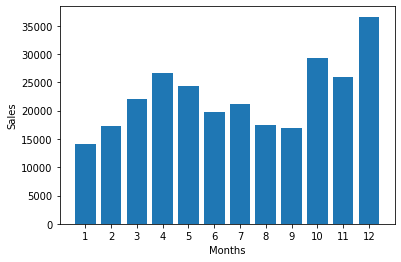

In [12]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel("Sales")
plt.xlabel("Months")
plt.show()

## Question 2: What cities had the highest number of sales?

In [13]:
results = df.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales,Hour
City,,,,,
Atlanta GA,16602,16602,104794,21184,214264
Austin TX,11153,11153,69829,14469,141946
Boston MA,22528,22528,141112,29600,288225
Dallas TX,16730,16730,104620,21964,214390
Los Angeles CA,33289,33289,208325,43241,427444
New York City NY,27932,27932,175741,36106,357696
Portland ME,2750,2750,17144,3500,35211
Portland OR,11303,11303,70621,14849,144421
San Francisco CA,50239,50239,315520,65223,643265


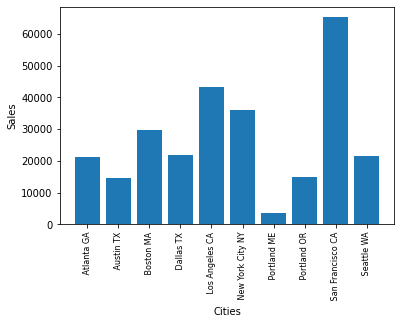

In [14]:
import matplotlib.pyplot as plt

cities = [city for city, df in df.groupby('City')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation="vertical", size=8)
plt.ylabel("Sales")
plt.xlabel("Cities")
plt.show()

## Question 3: At what time should we display the ads?

In [15]:
results = df.groupby('Hour').sum()
results

,Quantity Ordered,Price Each,Month,Sales
Hour,,,,
0,4428,4428,27554,5866
1,2619,2619,16657,3301
2,1398,1398,8507,1816
3,928,928,5904,1186
4,937,937,6148,1149
5,1493,1493,9301,2023
6,2810,2810,17539,3694
7,4556,4556,28850,5992
8,7002,7002,43626,9030


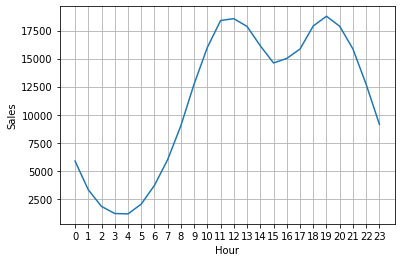

In [16]:
import matplotlib.pyplot as plt

hours = range(0,24)
plt.plot(hours, results['Sales'])
plt.xticks(hours)
plt.ylabel("Sales")
plt.xlabel("Hour")
plt.grid()
plt.show()

## Question 4: What products are most often sold together?

### Create a new dataframe containing only the duplicate order ids

In [28]:
sold_together = df[df['Order ID'].duplicated(keep=False)]
sold_together.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
118,223028,Vareebadd Phone,1,1,2019-07-07 10:21:00,"969 10th St, San Francisco, CA 94016",7,1,San Francisco CA,10
119,223028,USB-C Charging Cable,2,2,2019-07-07 10:21:00,"969 10th St, San Francisco, CA 94016",7,4,San Francisco CA,10
120,223028,Wired Headphones,1,1,2019-07-07 10:21:00,"969 10th St, San Francisco, CA 94016",7,1,San Francisco CA,10
140,223048,Vareebadd Phone,1,1,2019-07-21 17:19:00,"168 8th St, Portland, OR 97035",7,1,Portland OR,17
141,223048,USB-C Charging Cable,2,2,2019-07-21 17:19:00,"168 8th St, Portland, OR 97035",7,4,Portland OR,17


### Group products sold together on a new column

In [29]:
sold_together['Grouped'] = duplicated_ids.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
sold_together.head()

/tmp/ipykernel_5446/3368873877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_together['Grouped'] = duplicated_ids.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
118,223028,Vareebadd Phone,1,1,2019-07-07 10:21:00,"969 10th St, San Francisco, CA 94016",7,1,San Francisco CA,10,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
119,223028,USB-C Charging Cable,2,2,2019-07-07 10:21:00,"969 10th St, San Francisco, CA 94016",7,4,San Francisco CA,10,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
120,223028,Wired Headphones,1,1,2019-07-07 10:21:00,"969 10th St, San Francisco, CA 94016",7,1,San Francisco CA,10,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,Vareebadd Phone,1,1,2019-07-21 17:19:00,"168 8th St, Portland, OR 97035",7,1,Portland OR,17,"Vareebadd Phone,USB-C Charging Cable"
141,223048,USB-C Charging Cable,2,2,2019-07-21 17:19:00,"168 8th St, Portland, OR 97035",7,4,Portland OR,17,"Vareebadd Phone,USB-C Charging Cable"


### Drop out duplicated products

In [30]:
sold_together = sold_together[['Order ID', 'Grouped']].drop_duplicates()
sold_together.head()

,Order ID,Grouped
118,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,"Vareebadd Phone,USB-C Charging Cable"
188,223095,"Apple Airpods Headphones,AA Batteries (4-pack)"
201,223106,"Wired Headphones,Vareebadd Phone"
213,223117,"Google Phone,USB-C Charging Cable"


### Count pairs of products sold together

In [33]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in sold_together['Grouped']:
    items = row.split(',')
    count.update(Counter(combinations(items, 2)))
    
count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]